# Stroke Analysis & Prediction

### Project Overview
The Stroke Analysis & Prediction project aims to analyze and predict the likelihood of a patient experiencing a stroke based on various input parameters such as gender, age, presence of hypertension, heart disease, marital status, work type, residence type, average glucose level, body mass index (BMI), and smoking status. The project utilizes exploratory data analysis (EDA), missing value analysis, and employs machine learning and deep learning models for prediction.

# Introduction
* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
* This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient

![Stroke Image](images/Stroke-Signs-Men-Women-medium.jpg)


# Analysis Content
1. [Python Libraries: Import essential libraries for data manipulation, visualization, and machine learning.](#1)
2. [Data Content: Description of the dataset, including each attribute and its significance.](#2)
3. [Data Loading and Exploration: Read the data from the CSV file, display the first few rows, and provide basic statistics and information about the dataset.](#3)
4. [Handling Missing Values: Identify and impute missing values in the dataset, especially focusing on BMI.](#4)
5. [Unique Value Examination: Analyze the unique values in each column to understand the diversity of the data.](#5)
6. [Categorical Data Analysis: Visual and statistical analysis of categorical features like gender, hypertension, heart disease, etc., with respect to stroke occurrence.](#6)
7. [Numerical Data Analysis: Explore numerical features like age, average glucose level, and BMI using scatter plots and pair plots.](#7)
8. [Feature Engineering: <br><b>Standardization:</b> Standardize numerical features to have a mean of 0 and a standard deviation of 1.<br><b>Normalization:</b> Apply Min-Max scaling to transform features by scaling each feature to a given range.<br><b>Outlier Detection and Handling:</b> Detect and handle outliers in the data using methods like IQR.<br><b>Encoding Categorical Variables:</b>Convert categorical variables into a form that could be provided to ML algorithms.](#8)
9. [Exploratory Data Analysis (EDA):<br><b>Box Plot Analysis:</b> Understand the distribution and identify outliers in the data.<br><b>Swarm Plot Analysis:</b> Visualize the distribution of data points.<br><b>Cat Plot Analysis:</b> Detailed analysis of categorical data.<br><b>Correlation Analysis:</b> Evaluate the correlation between different numerical features.](#9)<br>
10. [Machine Learning Models:<br><b>Logistic Regression:</b> Base model for comparison, including performance metrics like accuracy, precision, recall, and F1 score.<br><b>Decision Tree:</b> Analyze the decision tree model and its performance.<br><b>Random Forest: </b>Explore random forest model effectiveness in prediction.<br><b>Support Vector </b>Machine (SVM): Evaluate the SVM model's performance.<br><b>Ensemble Learning: </b>Combine different models and analyze their collective performance](#10)
11. [Deep Learning Models:<br><b>CNN-1D:</b> Implement and evaluate a 1D Convolutional Neural Network.<br><b>LSTM and BiLSTM:</b> Use LSTM and BiLSTM models for prediction and compare their performance.<br><b>Hybrid Models:</b> Create and evaluate hybrid models combining CNN-1D with LSTM and BiLSTM.<br><b>Deep Learning Ensemble:</b> Combine different deep learning models using ensemble techniques.](#11)
12. [Model Comparison and Selection: Compare all models based on their performance metrics and select the best performing model.](#12)
13. [Conclusion and Recommendations](#13)



<a id="1"> </a>
# Python Libraries
* In this section we import used pyhton libraries.


In [93]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, precision_score,recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso




import warnings
warnings.filterwarnings("ignore")

<a id="2"> </a>
# Data Content
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

<a id="3"> </a>

# Read and Analyse Data
* In this section we read healthcare-dataset-stroke-data.csv

In [94]:
# read data 
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [95]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [96]:
# describe basic statistic of data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [97]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<a id="4"> </a>
# Missing Value Analyses



In [98]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [99]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)


In [100]:
df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<a id="5"> </a>
# Unique Value Analyses


In [101]:
for i in list(df.columns):
    print("{}---{}".format(i , df[i].value_counts().shape[0]))

id---5110
gender---3
age---104
hypertension---2
heart_disease---2
ever_married---2
work_type---5
Residence_type---2
avg_glucose_level---3979
bmi---419
smoking_status---4
stroke---2


<a id="6"> </a>

# Categorical Feature Analyses

In [102]:
categorical_list = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]

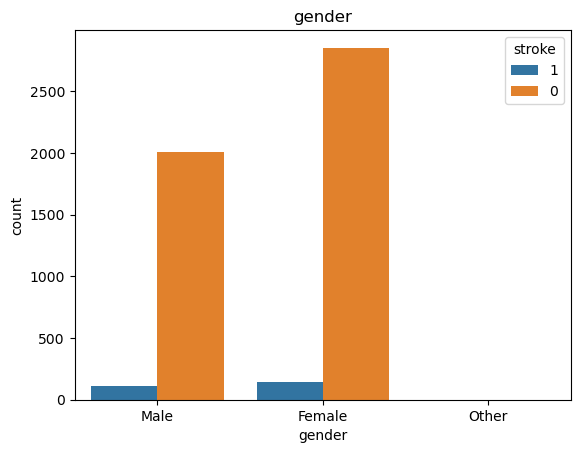

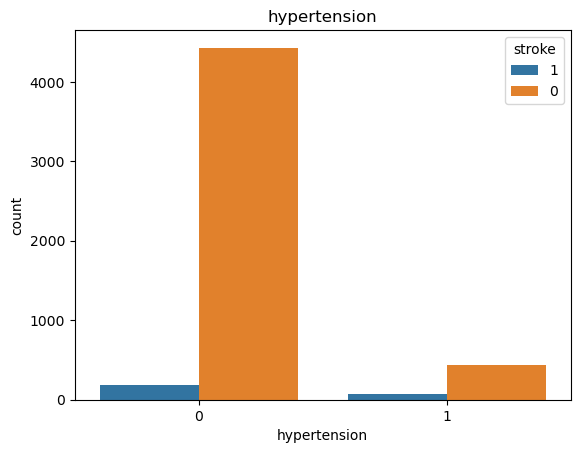

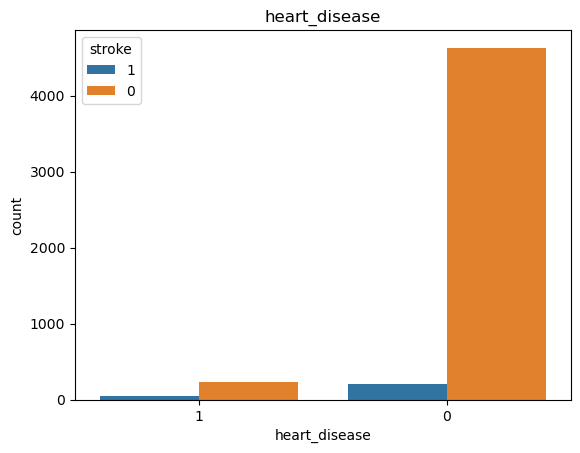

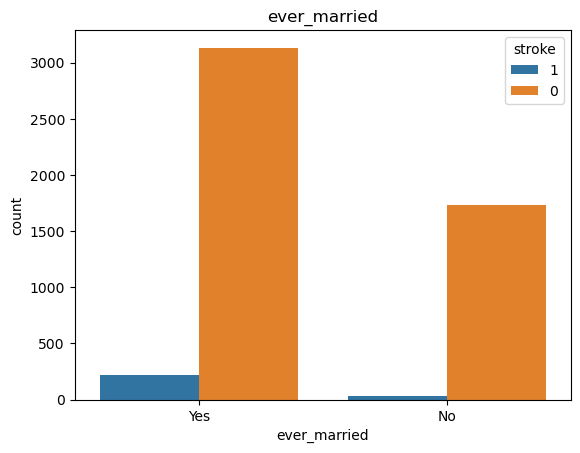

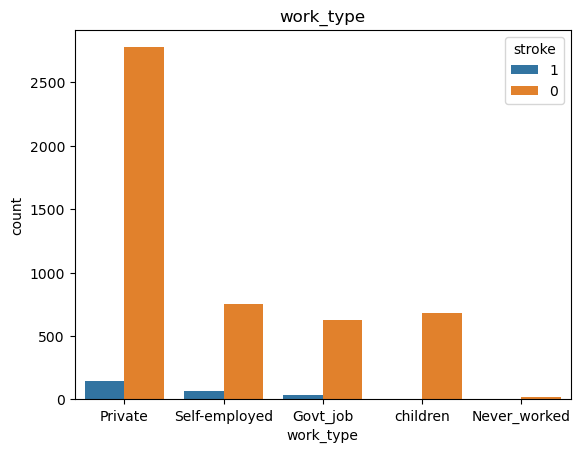

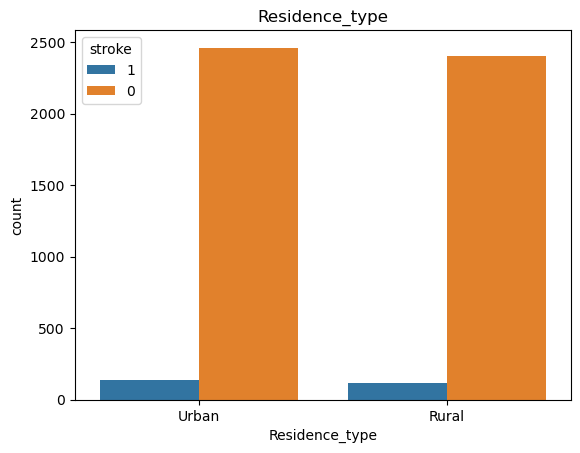

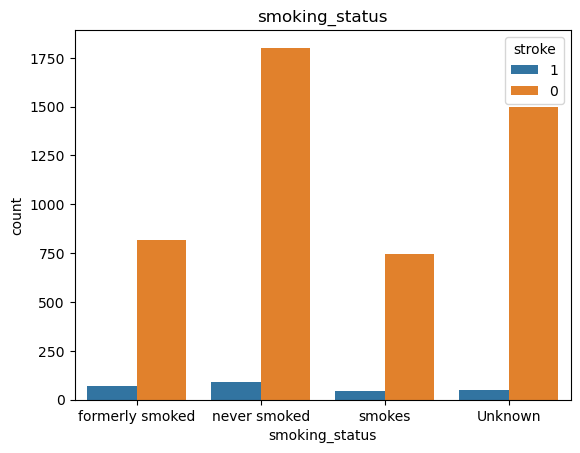

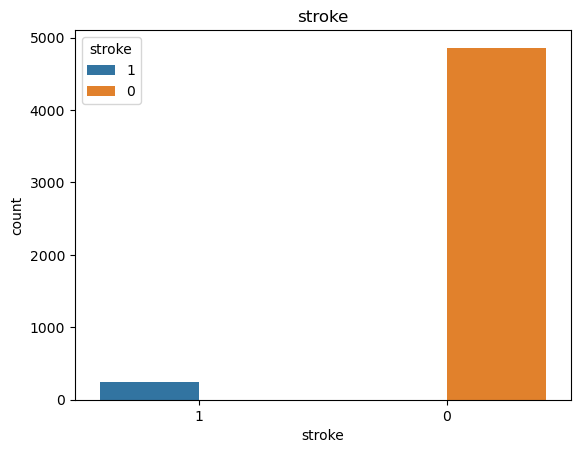

In [103]:
df_categoric= df.loc[:, categorical_list].astype(str)
for i in categorical_list:
        plt.figure()
        sns.countplot(x=i, data=df_categoric, hue="stroke")
        plt.title(i)

<a id="7"> </a>

# Numeric Feature Analyses
* Bivariate data analysis with scatter plot.

In [104]:
numeric_list = ["age","avg_glucose_level","bmi","stroke"]

In [105]:
# df_numeric = df.loc[:,numeric_list]
# sns.pairplot(df_numeric, hue="stroke",diag_kind="kde")
# plt.show()

<a id="8"> </a>

# FEATURE ENGINEERING


## Standardization

In [106]:
# scaler = StandardScaler()
# scaler

In [107]:
# scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [108]:
# scaled_array

In [109]:
# pd.DataFrame(scaled_array).describe()


# Normalization

In [110]:
# Min-Max Scaler nesnesini oluşturuldu
scaler = MinMaxScaler()

In [111]:
# Veri setindeki sütunları normalizasyon işlemine tabi tutuldu
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [112]:
scaled_array

array([[0.81689453, 0.80126489, 0.30126002],
       [0.74365234, 0.67902317, 0.21298095],
       [0.97558594, 0.23451205, 0.25429553],
       ...,
       [0.42626953, 0.12865848, 0.2325315 ],
       [0.62158203, 0.51320284, 0.17525773],
       [0.53613281, 0.13922999, 0.18213058]])

<a id="9"> </a>

# Box Plot Analyses

In [113]:
df_dummy = pd.DataFrame(scaled_array, columns=numeric_list[:-1])
df_dummy.head()

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.212981
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930


In [114]:
df_dummy = pd.concat([df_dummy, df.loc[:,"stroke"]],axis=1)
df_dummy.head()

,age,avg_glucose_level,bmi,stroke
0,0.816895,0.801265,0.301260,1
1,0.743652,0.679023,0.212981,1
2,0.975586,0.234512,0.254296,1
3,0.597168,0.536008,0.276060,1
4,0.963379,0.549349,0.156930,1


In [115]:
data_melted=pd.melt(df_dummy,id_vars="stroke",var_name="features",value_name="value")
data_melted.head(20)

,stroke,features,value
0,1,age,0.816895
1,1,age,0.743652
2,1,age,0.975586
3,1,age,0.597168
4,1,age,0.963379
5,1,age,0.987793
6,1,age,0.902344
7,1,age,0.841309
8,1,age,0.719238
9,1,age,0.951172


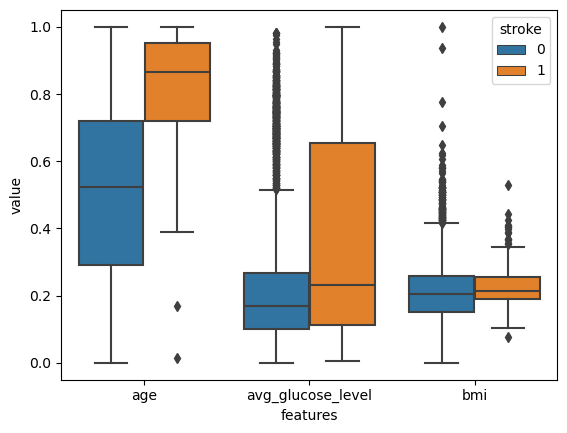

In [116]:
# box plot
plt.figure()
sns.boxplot(x="features",y="value",hue="stroke",data=data_melted)
plt.show()


# Swarm Plot Analyses


In [117]:
# swarm-plot
#plt.figure()
#sns.swarmplot(x="features",y="value",hue="stroke",data=data_melted)
#plt.show()


# Cat Plot Analyses

In [118]:
# sns.catplot(x="hypertension", y="age", hue="stroke",col="gender",kind="swarm",data=df)
# plt.show

<a id="13"> </a>
# Correlation Analyses

In [119]:
# # Select only numeric columns from the DataFrame
# numeric_columns = df.select_dtypes(include=[np.number])

# # Plot the correlation matrix for numeric columns
# plt.figure(figsize=(14, 10))
# sns.heatmap(numeric_columns.corr(), annot=True, fmt=".1f", linewidths=.7)
# plt.show()


<a id="14"> </a>
# Outlier Detection
* Outliers can disrupt ML process <br> <br>
![Outliers Image](images/outliers.png)


In [120]:
numeric_list = ["age","avg_glucose_level","bmi","stroke"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.600000,1
1,61.0,202.21,28.893237,1
2,80.0,105.92,32.500000,1
3,49.0,171.23,34.400000,1
4,79.0,174.12,24.000000,1


In [121]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [122]:


# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 + 2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape) 


Old shape:  (5110,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (5110, 12)
Old shape:  (5110,)
(array([   0,   13,   14,   17,   19,   21,   22,   23,   29,   30,   33,
         36,   44,   45,   57,   66,   73,   76,   90,   95,   97,  102,
        113,  115,  122,  123,  124,  135,  137,  144,  149,  151,  155,
        157,  179,  187,  189,  193,  196,  212,  217,  219,  220,  225,
        234,  235,  242,  243,  254,  256,  277,  278,  303,  307,  314,
        318,  325,  326,  330,  332,  337,  343,  360,  365,  386,  396,
        399,  429,  433,  444,  467,  544,  552,  563,  576,  583,  610,
        616,  620,  642,  708,  746,  755,  785,  816,  865,  887,  894,
        923,  929,  930,  948, 1011, 1061, 1067, 1070, 1092, 1097, 1113,
       1118, 1158, 1166, 1173, 1178, 1187, 1189, 1207, 1214, 1228, 1233,
       1245, 1257, 1300, 1322, 1382, 1384, 1398, 1411, 1412, 1414, 1436,
       1453, 1468, 1472, 1474, 1485, 1497, 1503, 1512, 1526, 1529, 1531,
     

In [123]:
"""
for i in numeric_list:
    # IQR
    Q1 = np.percentile(df.loc[:, i], 25)
    Q3 = np.percentile(df.loc[:, i], 75)

    IQR = Q3 - Q1

    print("Old shape: ", df.loc[:, i].shape)

    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 + 2.5 * IQR))

    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5 * IQR))

    print("{} -- {}".format(upper, lower))

    try:
        # Replace outliers with the mean
        df.loc[upper, i] = np.mean(df.loc[:, i])
    except:
        print("KeyError: {} not found in axis".format(upper[0]))

    try:
        # Replace outliers with the mean
        df.loc[lower, i] = np.mean(df.loc[:, i])
    except:
        print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", df.shape)
"""


'\nfor i in numeric_list:\n    # IQR\n    Q1 = np.percentile(df.loc[:, i], 25)\n    Q3 = np.percentile(df.loc[:, i], 75)\n\n    IQR = Q3 - Q1\n\n    print("Old shape: ", df.loc[:, i].shape)\n\n    # upper bound\n    upper = np.where(df.loc[:, i] >= (Q3 + 2.5 * IQR))\n\n    # lower bound\n    lower = np.where(df.loc[:, i] <= (Q1 - 2.5 * IQR))\n\n    print("{} -- {}".format(upper, lower))\n\n    try:\n        # Replace outliers with the mean\n        df.loc[upper, i] = np.mean(df.loc[:, i])\n    except:\n        print("KeyError: {} not found in axis".format(upper[0]))\n\n    try:\n        # Replace outliers with the mean\n        df.loc[lower, i] = np.mean(df.loc[:, i])\n    except:\n        print("KeyError: {} not found in axis".format(lower[0]))\n\n    print("New shape: ", df.shape)\n'

<a id="15"> </a>
# Modelling

In [124]:
df1 = df.copy()


### Encoding Categorical Columns
![Encoding Image](images/encoding.png)


In [125]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,51676,61.0,202.21,28.893237,1,False,False,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,105.92,32.500000,1,True,False,False,True,True,False,True,False,False,False,False,True,False
3,60182,49.0,171.23,34.400000,1,False,False,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,174.12,24.000000,1,False,False,True,False,True,False,False,True,False,False,False,True,False
5,56669,81.0,186.21,29.000000,1,True,False,False,False,True,False,True,False,False,True,True,False,False


In [126]:
# 
X = df1.drop(["stroke"], axis = 1)
y = df1[["stroke"]]

### Scaling

In [127]:
scaler = StandardScaler()
scaler

StandardScaler()

In [128]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,51676,0.853672,3.289330,0.046291,False,False,False,False,True,False,False,True,False,False,False,True,False
2,31112,1.698995,0.277552,0.522805,True,False,False,True,True,False,True,False,False,False,False,True,False
3,60182,0.319784,2.320331,0.773827,False,False,False,False,True,False,True,False,False,True,False,False,True
4,1665,1.654505,2.410725,-0.600188,False,False,True,False,True,False,False,True,False,False,False,True,False
5,56669,1.743486,2.788878,0.060396,True,False,False,False,True,False,True,False,False,True,True,False,False


### Train/Test Split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (3323, 17)
X_test: (1425, 17)
y_train: (3323, 1)
y_test: (1425, 1)


# Lasso ile Feature Selection


In [130]:
from sklearn.preprocessing import StandardScaler



# Verileri standartlaştırın (Lasso regresyonu için genellikle önerilir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso modelini oluşturun ve eğitin
lasso_model = Lasso(alpha=0.01)  # alpha, düzenleme parametresidir
lasso_model.fit(X_train_scaled, y_train)

# Katsayıları kontrol edin
coefficients = lasso_model.coef_

# Sıfıra eşit veya çok yakın olan katsayıları belirleyin
selected_features = [feature for feature, coef in zip(X_train.columns, coefficients) if abs(coef) > 0]

# Seçilen özellikleri yazdırın
print("Seçilen Özellikler: {}".format(selected_features))

# Test setini kullanarak modelin performansını değerlendirin
lasso_score = lasso_model.score(X_test_scaled, y_test)
print("Lasso R^2 Skoru: {:.2f}".format(lasso_score))


Seçilen Özellikler: ['age', 'avg_glucose_level', 'hypertension_1']
Lasso R^2 Skoru: 0.05


# Lasso Sonrası ENSEMBLE

In [131]:
# Seçilen özellikleri kullanarak yeni bir veri seti oluştur
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

# Ensemble modelini oluştur
logreg = LogisticRegression()
dt_classifier = DecisionTreeClassifier(random_state=3)
rf_classifier = RandomForestClassifier(random_state=3)
svm_classifier = SVC(random_state=3, probability=True)

ensemble_model_after_lasso = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='hard')

# Ensemble modelini eğit
ensemble_model_after_lasso.fit(X_train_lasso, y_train.values.ravel())

# Test verileri üzerinde tahmin yapma
y_pred_ensemble_after_lasso = ensemble_model_after_lasso.predict(X_test_lasso)

# Test accuracy hesaplama
accuracy_ensemble_after_lasso = accuracy_score(y_pred_ensemble_after_lasso, y_test)
print("Ensemble Test accuracy after Lasso: {:.2f}".format(accuracy_ensemble_after_lasso))

Ensemble Test accuracy after Lasso: 0.96


# PCA 

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your feature matrices

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
n_components = 10  # Set the number of components you want to keep
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the shapes after PCA
print("X_train after PCA: {}".format(X_train_pca.shape))
print("X_test after PCA: {}".format(X_test_pca.shape))
print("Explained Variance Ratio: {}".format(pca.explained_variance_ratio_))



X_train after PCA: (3323, 10)
X_test after PCA: (1425, 10)
Explained Variance Ratio: [0.17241937 0.09851001 0.08377635 0.06920911 0.06562605 0.06093473
 0.06022867 0.05837185 0.05669291 0.05572255]


<a id="10"> </a>

### Logistic Regression


In [133]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [134]:
# fitting = training
logreg.fit(X_train, y_train)

LogisticRegression()

In [135]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.99691604, 0.00308396],
       [0.99395214, 0.00604786],
       [0.99355327, 0.00644673],
       ...,
       [0.98766333, 0.01233667],
       [0.98282451, 0.01717549],
       [0.99713394, 0.00286606]])

In [136]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.996916,0.003084,0
1,0.993952,0.006048,0
2,0.993553,0.006447,0
3,0.824912,0.175088,0
4,0.978216,0.021784,0


In [138]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))


Test accuracy: 0.9578947368421052


In [139]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

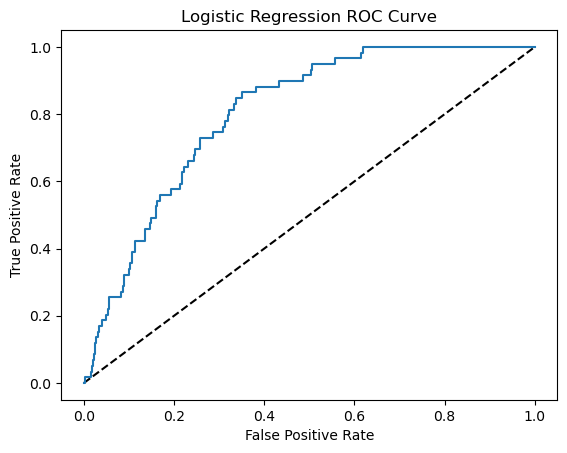

In [140]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()
## Sample az olduğu için curve gibi gözükmüyor ama sample fazla olsaydı curve gibi olurdu

### Logistic Regression Hyperparameter Tuning


In [141]:
lr = LogisticRegression()
lr

LogisticRegression()

In [142]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [143]:
lr_searcher = GridSearchCV(lr, parameters)


In [144]:
lr_searcher.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [145]:
print("Best parameters: ",lr_searcher.best_params_)


Best parameters:  {'penalty': 'l2'}


In [146]:
y_pred = lr_searcher.predict(X_test)

In [147]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))


Test accuracy: 0.9578947368421052


In [148]:
# Precision hesaplama
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
print("Test precision: {}".format(precision))

Test precision: 0.47928370786516855


In [149]:
# Logistic Regression recall-f1
recall_logreg = recall_score(y_test, y_pred, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
f1_logreg = f1_score(y_test, y_pred, average='macro')
print("Logistic Regression Recall: {}".format(recall_logreg))
print("Logistic Regression F1 Score: {}".format(f1_logreg))

Logistic Regression Recall: 0.49963396778916547
Logistic Regression F1 Score: 0.489247311827957


# Lasso sonrası Logistic Regression

In [150]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are defined
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)  # Replace 'k' with the desired number of features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

# Logistic Regression modelini oluştur
logreg_model = LogisticRegression()
logreg_model.fit(X_train_selected, y_train)

# Test setinde modelin performansını değerlendir
y_pred_logreg = logreg_model.predict(X_test_selected)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Doğruluk Skoru: {:.2f}".format(accuracy_logreg))


Logistic Regression Doğruluk Skoru: 0.96


# PCA Sonrası Logistic Reggression

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=3)

# Fit the model on the training data
logistic_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_pca)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Logistic Regression with PCA: {:.2f}%".format(accuracy * 100))


Accuracy Logistic Regression with PCA: 95.86%


# PCA Sonrası Decision Tree - Random Forest - SVM

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=3)
decision_tree_model.fit(X_train_pca, y_train)
y_pred_dt = decision_tree_model.predict(X_test_pca)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Decision Tree with PCA: {:.2f}%".format(accuracy_dt * 100))

# Random Forest
random_forest_model = RandomForestClassifier(random_state=3)
random_forest_model.fit(X_train_pca, y_train)
y_pred_rf = random_forest_model.predict(X_test_pca)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest with PCA: {:.2f}%".format(accuracy_rf * 100))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=3)
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM with PCA: {:.2f}%".format(accuracy_svm * 100))


Accuracy Decision Tree with PCA: 91.58%
Accuracy Random Forest with PCA: 95.79%
Accuracy SVM with PCA: 95.86%


# PCA Sonrası Ensemble


In [153]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
models = [('Logistic Regression', logistic_model),
          ('Decision Tree', decision_tree_model),
          ('Random Forest', random_forest_model),
          ('SVM', svm_model)]

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=models, voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_pca)

# Evaluate the accuracy of the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy Ensemble Model with PCA: {:.2f}%".format(accuracy_ensemble * 100))


Accuracy Ensemble Model with PCA: 95.86%


<a id="16"> </a>

# Decision Tree Model

In [154]:
### Decision Tree modeli oluşturma
dt_classifier = DecisionTreeClassifier(random_state=3)

In [155]:
# Modeli eğitme (fitting)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [156]:
# Test verileri üzerinde tahmin yapma
y_pred_dt = dt_classifier.predict(X_test)

In [157]:
accuracy_dt = accuracy_score(y_pred_dt, y_test)
print("Decision Tree Test accuracy: {}".format(accuracy_dt))

Decision Tree Test accuracy: 0.9263157894736842


In [158]:
# Precision hesaplama
precision_dt = precision_score(y_test, y_pred_dt, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
print("Decision Tree Test Precision: {}".format(precision_dt))

Decision Tree Test Precision: 0.5323386222031633


In [159]:
# Decision Tree recall-f1
recall_dt = recall_score(y_test, y_pred_dt, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print("Decision Tree Recall: {}".format(recall_dt))
print("Decision Tree F1 Score: {}".format(f1_dt))

Decision Tree Recall: 0.5318137826637219
Decision Tree F1 Score: 0.532072391567452


# Lasso Sonrası Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree modelini oluştur
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected, y_train)

# Test setinde modelin performansını değerlendir
y_pred_dt = dt_model.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Doğruluk Skoru: {:.2f}".format(accuracy_dt))


Decision Tree Doğruluk Skoru: 0.95


<a id="17"> </a>
# Random Forest Model

In [161]:
# Random Forest modeli oluşturma
rf_classifier = RandomForestClassifier(random_state=3)

In [162]:
# Modeli eğitme (fitting)
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=3)

In [163]:
# Test verileri üzerinde tahmin yapma
y_pred_rf = rf_classifier.predict(X_test)

In [164]:
# Test accuracy hesaplama
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print("Random Forest Test accuracy: {}".format(accuracy_rf))

Random Forest Test accuracy: 0.9578947368421052


In [165]:
# Precision hesaplama
precision_rf = precision_score(y_test, y_pred_rf, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
print("Random Forest Test Precision: {}".format(precision_rf))

Random Forest Test Precision: 0.47928370786516855


In [166]:
# Random Forest recall-f1
recall_rf = recall_score(y_test, y_pred_rf, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print("Random Forest Recall: {}".format(recall_rf))
print("Random Forest F1 Score: {}".format(f1_rf))

Random Forest Recall: 0.49963396778916547
Random Forest F1 Score: 0.489247311827957


# Lasso Sonrası Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluştur
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected, y_train)

# Test setinde modelin performansını değerlendir
y_pred_rf = rf_model.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Doğruluk Skoru: {:.2f}".format(accuracy_rf))


Random Forest Doğruluk Skoru: 0.95


<a id="18"> </a>

# SVM (Support Vector Machine) Model
 

In [168]:
# SVM modeli oluşturma
svm_classifier = SVC(random_state=3)

In [169]:
# Modeli eğitme (fitting)
svm_classifier.fit(X_train, y_train.values.ravel())

SVC(random_state=3)

In [170]:
# Test verileri üzerinde tahmin yapma
y_pred_svm = svm_classifier.predict(X_test)

In [171]:
# Test accuracy hesaplama
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print("SVM Test accuracy: {}".format(accuracy_svm))

SVM Test accuracy: 0.9585964912280702


In [172]:
# Precision hesaplama
precision_svm = precision_score(y_test, y_pred_svm, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
print("SVM Test Precision: {}".format(precision_svm))

SVM Test Precision: 0.4792982456140351


In [173]:
# SVM recall-f1
recall_svm = recall_score(y_test, y_pred_svm, average='macro')  # 'macro' veya diğer seçenekleri kullanabilirsiniz
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print("SVM Recall: {}".format(recall_svm))
print("SVM F1 Score: {}".format(f1_svm))

SVM Recall: 0.5
SVM F1 Score: 0.48943031171623075


# Lasso Sonrası SVM

In [174]:
import pandas as pd

# Seçilen özellikleri içeren DataFrame oluştur
X_train_selected = pd.DataFrame(X_train_scaled[:, selected_feature_indices], columns=selected_features)

# SVM modelini oluştur
svm_model = SVC()
svm_model.fit(X_train_selected, y_train)

# Test setinde modelin performansını değerlendir
X_test_selected = pd.DataFrame(X_test_scaled[:, selected_feature_indices], columns=selected_features)
y_pred_svm = svm_model.predict(X_test_selected)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Doğruluk Skoru: {:.2f}".format(accuracy_svm))


SVM Doğruluk Skoru: 0.96


### ENSEMBLE

In [175]:
from sklearn.ensemble import VotingClassifier

# Modelleri oluşturma
logreg = LogisticRegression()
dt_classifier = DecisionTreeClassifier(random_state=3)
rf_classifier = RandomForestClassifier(random_state=3)
svm_classifier = SVC(random_state=3, probability=True)  # Olasılıkları hesaplamak için probability=True ayarlayın

# Ensemble modeli oluşturma
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'soft' kullanarak tahmin olasılıklarını kullanlabilir.

# Ensemble modelini eğitme (fitting)
ensemble_model.fit(X_train, y_train.values.ravel())

# Test verileri üzerinde tahmin yapma
y_pred_ensemble = ensemble_model.predict(X_test)

# Test accuracy hesaplama
accuracy_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Ensemble Test accuracy: {}".format(accuracy_ensemble))


Ensemble Test accuracy: 0.9585964912280702


<a id="11"> </a>

# Deep Learning Models


# CNN-1D (epoch-10)

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
# CNN-1D modelini oluşturma
input_length = X.shape[1]
print(X.shape)
input_dim = 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, input_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Test verileri üzerinde tahmin yapma
y_pred_cnn = (model.predict(X_test) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN-1D Test accuracy: {}".format(accuracy_cnn))


(4748, 17)


Epoch 1/10
119/119 [==============================] - 3s 8ms/step - loss: 30.6124 - accuracy: 0.9213 - val_loss: 36.9373 - val_accuracy: 0.9442
Epoch 2/10
119/119 [==============================] - 1s 6ms/step - loss: 20.3609 - accuracy: 0.9239 - val_loss: 30.7578 - val_accuracy: 0.9442
Epoch 3/10
119/119 [==============================] - 1s 6ms/step - loss: 16.4689 - accuracy: 0.9210 - val_loss: 23.5774 - val_accuracy: 0.9442
Epoch 4/10
119/119 [==============================] - 1s 6ms/step - loss: 18.3799 - accuracy: 0.9265 - val_loss: 14.9125 - val_accuracy: 0.9453
Epoch 5/10
119/119 [==============================] - 1s 7ms/step - loss: 12.5828 - accuracy: 0.9215 - val_loss: 15.7989 - val_accuracy: 0.9442
Epoch 6/10
119/119 [==============================] - 1s 7ms/step - loss: 9.9805 - accuracy: 0.9276 - val_loss: 18.0647 - val_accuracy: 0.9453
Epoch 7/10
119/119 [==============================] - 1s 6ms/step - loss: 8.7632 - accuracy: 0.9294 - val_loss: 22.0614 - val_accuracy: 0

# CNN-1D (epoch-50)

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
# CNN-1D modelini oluşturma
input_length = X.shape[1]
print(X.shape)
input_dim = 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, input_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Test verileri üzerinde tahmin yapma
y_pred_cnn = (model.predict(X_test) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN-1D Test accuracy: {}".format(accuracy_cnn))


(4748, 17)


Epoch 1/50
119/119 [==============================] - 3s 9ms/step - loss: 32.0441 - accuracy: 0.9226 - val_loss: 7.2193 - val_accuracy: 0.9442
Epoch 2/50
119/119 [==============================] - 1s 7ms/step - loss: 22.4037 - accuracy: 0.9223 - val_loss: 11.5299 - val_accuracy: 0.9442
Epoch 3/50
119/119 [==============================] - 1s 7ms/step - loss: 28.9638 - accuracy: 0.9236 - val_loss: 18.5668 - val_accuracy: 0.9442
Epoch 4/50
119/119 [==============================] - 1s 7ms/step - loss: 18.5359 - accuracy: 0.9247 - val_loss: 4.0131 - val_accuracy: 0.9432
Epoch 5/50
119/119 [==============================] - 1s 7ms/step - loss: 15.7479 - accuracy: 0.9155 - val_loss: 35.2085 - val_accuracy: 0.9442
Epoch 6/50
119/119 [==============================] - 1s 6ms/step - loss: 19.3252 - accuracy: 0.9289 - val_loss: 25.0413 - val_accuracy: 0.9442
Epoch 7/50
119/119 [==============================] - 1s 6ms/step - loss: 14.3751 - accuracy: 0.9308 - val_loss: 11.6006 - val_accuracy: 0

# LSTM 1-D (epoch-10)

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

# LSTM modelini oluşturma
input_length = X.shape[1]
input_dim = 1  # Assuming your features are 1-dimensional
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, activation='relu', input_shape=(input_length, input_dim)))
model_lstm.add(Dense(units=128, activation='relu'))
model_lstm.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Test verileri üzerinde tahmin yapma
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Test accuracy: {}".format(accuracy_lstm))


Epoch 1/10
119/119 [==============================] - 7s 24ms/step - loss: 2.4768 - accuracy: 0.9360 - val_loss: 0.2533 - val_accuracy: 0.9442
Epoch 2/10
119/119 [==============================] - 2s 17ms/step - loss: 0.1855 - accuracy: 0.9610 - val_loss: 0.2179 - val_accuracy: 0.9442
Epoch 3/10
119/119 [==============================] - 2s 17ms/step - loss: 0.1970 - accuracy: 0.9602 - val_loss: 0.2251 - val_accuracy: 0.9442
Epoch 4/10
119/119 [==============================] - 2s 17ms/step - loss: 0.1797 - accuracy: 0.9610 - val_loss: 0.2785 - val_accuracy: 0.9442
Epoch 5/10
119/119 [==============================] - 2s 17ms/step - loss: 0.1754 - accuracy: 0.9610 - val_loss: 0.2630 - val_accuracy: 0.9442
Epoch 6/10
119/119 [==============================] - 2s 17ms/step - loss: 0.1744 - accuracy: 0.9610 - val_loss: 0.2526 - val_accuracy: 0.9442
Epoch 7/10
119/119 [==============================] - 2s 17ms/step - loss: 0.1737 - accuracy: 0.9610 - val_loss: 0.2245 - val_accuracy: 0.9442

# LSTM 1-D (epoch-50)

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

# LSTM modelini oluşturma
input_length = X.shape[1]
input_dim = 1  # Assuming your features are 1-dimensional
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, activation='relu', input_shape=(input_length, input_dim)))
model_lstm.add(Dense(units=128, activation='relu'))
model_lstm.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Test verileri üzerinde tahmin yapma
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Test accuracy: {}".format(accuracy_lstm))


Epoch 1/50
119/119 [==============================] - 3s 10ms/step - loss: 11.7047 - accuracy: 0.8847 - val_loss: 0.2333 - val_accuracy: 0.9442
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1787 - accuracy: 0.9610 - val_loss: 0.2163 - val_accuracy: 0.9442
Epoch 3/50
119/119 [==============================] - 1s 7ms/step - loss: 0.1676 - accuracy: 0.9610 - val_loss: 0.2159 - val_accuracy: 0.9442
Epoch 4/50
119/119 [==============================] - 1s 7ms/step - loss: 0.1675 - accuracy: 0.9610 - val_loss: 0.2170 - val_accuracy: 0.9442
Epoch 5/50
119/119 [==============================] - 1s 7ms/step - loss: 0.1678 - accuracy: 0.9610 - val_loss: 0.2170 - val_accuracy: 0.9442
Epoch 6/50
119/119 [==============================] - 1s 8ms/step - loss: 0.1673 - accuracy: 0.9610 - val_loss: 0.2196 - val_accuracy: 0.9442
Epoch 7/50
119/119 [==============================] - 1s 7ms/step - loss: 0.1670 - accuracy: 0.9610 - val_loss: 0.2226 - val_accuracy: 0.9442
Epoc

# BiLSTM-1D (epoch-10)

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

# BiLSTM modelini oluşturma
input_length = X.shape[1]
input_dim = 1
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=64, activation='relu'), input_shape=(input_length, input_dim)))
model_bilstm.add(Dense(units=128, activation='relu'))
model_bilstm.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model_bilstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Test verileri üzerinde tahmin yapma
y_pred_bilstm = (model_bilstm.predict(X_test) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print("BiLSTM Test accuracy: {}".format(accuracy_bilstm))


Epoch 1/10
119/119 [==============================] - 5s 13ms/step - loss: 12.4160 - accuracy: 0.9163 - val_loss: 6.4215 - val_accuracy: 0.9432
Epoch 2/10
119/119 [==============================] - 1s 9ms/step - loss: 7.0963 - accuracy: 0.9234 - val_loss: 19.2924 - val_accuracy: 0.9442
Epoch 3/10
119/119 [==============================] - 1s 9ms/step - loss: 3.1224 - accuracy: 0.9334 - val_loss: 0.9020 - val_accuracy: 0.9442
Epoch 4/10
119/119 [==============================] - 1s 10ms/step - loss: 4.1720 - accuracy: 0.9289 - val_loss: 7.4888 - val_accuracy: 0.9442
Epoch 5/10
119/119 [==============================] - 1s 9ms/step - loss: 2.6626 - accuracy: 0.9323 - val_loss: 2.9007 - val_accuracy: 0.9442
Epoch 6/10
119/119 [==============================] - 1s 9ms/step - loss: 2.1888 - accuracy: 0.9276 - val_loss: 3.6780 - val_accuracy: 0.9442
Epoch 7/10
119/119 [==============================] - 1s 9ms/step - loss: 1.6332 - accuracy: 0.9263 - val_loss: 4.5171 - val_accuracy: 0.9442
Ep

# BiLSTM-1D (epoch-50)

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

# BiLSTM modelini oluşturma
input_length = X.shape[1]
input_dim = 1
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(units=64, activation='relu'), input_shape=(input_length, input_dim)))
model_bilstm.add(Dense(units=128, activation='relu'))
model_bilstm.add(Dense(units=1, activation='sigmoid'))

# Modeli derleme
model_bilstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Test verileri üzerinde tahmin yapma
y_pred_bilstm = (model_bilstm.predict(X_test) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print("BiLSTM Test accuracy: {}".format(accuracy_bilstm))


Epoch 1/50
119/119 [==============================] - 5s 12ms/step - loss: 25.8468 - accuracy: 0.9150 - val_loss: 7.2548 - val_accuracy: 0.9442
Epoch 2/50
119/119 [==============================] - 1s 8ms/step - loss: 135.5797 - accuracy: 0.8952 - val_loss: 142.2148 - val_accuracy: 0.9442
Epoch 3/50
119/119 [==============================] - 1s 8ms/step - loss: 85.3845 - accuracy: 0.9165 - val_loss: 126.7899 - val_accuracy: 0.9442
Epoch 4/50
119/119 [==============================] - 1s 8ms/step - loss: 27.7847 - accuracy: 0.9305 - val_loss: 21.4257 - val_accuracy: 0.9442
Epoch 5/50
119/119 [==============================] - 1s 8ms/step - loss: 11.6120 - accuracy: 0.9281 - val_loss: 34.0075 - val_accuracy: 0.9442
Epoch 6/50
119/119 [==============================] - 1s 8ms/step - loss: 16.2991 - accuracy: 0.9242 - val_loss: 29.1386 - val_accuracy: 0.9442
Epoch 7/50
119/119 [==============================] - 1s 7ms/step - loss: 8.8541 - accuracy: 0.9263 - val_loss: 0.3001 - val_accuracy


<a id="12"> </a>
# Hibrit Model Oluşturmak (CNN 1-D LSTM 1-D)

In [182]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

# Conv1D modelini oluşturma
input_length = X.shape[1]
input_dim = 1
conv_input = Input(shape=(input_length, input_dim))
conv_model = Conv1D(filters=64, kernel_size=3, activation='relu')(conv_input)
conv_model = MaxPooling1D(pool_size=2)(conv_model)
conv_model = Flatten()(conv_model)
conv_model = Dense(units=128, activation='relu')(conv_model)

# LSTM modelini oluşturma
lstm_input = Input(shape=(input_length, input_dim))
lstm_model = LSTM(units=64, activation='relu')(lstm_input)
lstm_model = Dense(units=128, activation='relu')(lstm_model)

# Conv1D ve LSTM çıkışlarını birleştirme
merged = Concatenate()([conv_model, lstm_model])

# Ortak bir yoğun katman ekleyerek çıkış oluşturma
output = Dense(units=1, activation='sigmoid')(merged)

# Modeli oluşturma
combined_model = Model(inputs=[conv_input, lstm_input], outputs=output)

# Modeli derleme
combined_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
combined_model.fit([X_train, X_train], y_train, epochs=50, batch_size=32, validation_data=([X_test, X_test], y_test))

# Test verileri üzerinde tahmin yapma
y_pred_combined = (combined_model.predict([X_test, X_test]) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print("Combined Model Test accuracy: {}".format(accuracy_combined))


Epoch 1/50
119/119 [==============================] - 7s 21ms/step - loss: 52.6488 - accuracy: 0.9221 - val_loss: 60.9137 - val_accuracy: 0.9442
Epoch 2/50
119/119 [==============================] - 2s 15ms/step - loss: 32.0107 - accuracy: 0.9215 - val_loss: 42.4310 - val_accuracy: 0.9442
Epoch 3/50
119/119 [==============================] - 2s 16ms/step - loss: 25.5555 - accuracy: 0.9260 - val_loss: 18.6110 - val_accuracy: 0.9432
Epoch 4/50
119/119 [==============================] - 2s 16ms/step - loss: 23.2117 - accuracy: 0.9205 - val_loss: 31.1780 - val_accuracy: 0.9442
Epoch 5/50
119/119 [==============================] - 2s 15ms/step - loss: 26.7611 - accuracy: 0.9308 - val_loss: 28.1895 - val_accuracy: 0.9442
Epoch 6/50
119/119 [==============================] - 2s 16ms/step - loss: 22.0607 - accuracy: 0.9279 - val_loss: 55.1917 - val_accuracy: 0.9442
Epoch 7/50
119/119 [==============================] - 2s 16ms/step - loss: 21.1309 - accuracy: 0.9279 - val_loss: 28.8133 - val_ac

# Hibrit Model Oluşturmak (CNN 1-D BiLSTM 1-D)

In [183]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have X and y defined somewhere before this code

# Veri setinizi X ve y olarak ayırın
# X, giriş verileri (özellikler), y ise çıkış etiketleri olsun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)

# CNN-BiLSTM modelini oluşturma
input_length = X.shape[1]
input_dim = 1

# CNN kısmı
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, input_dim)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# BiLSTM kısmı
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=64, activation='relu'), input_shape=(input_length, input_dim)))

# Birleştirme
concatenated = Concatenate()([cnn_model.output, bilstm_model.output])
dense1 = Dense(units=128, activation='relu')(concatenated)
output_layer = Dense(units=1, activation='sigmoid')(dense1)

# Modeli oluşturma
merged_model = Model(inputs=[cnn_model.input, bilstm_model.input], outputs=output_layer)

# Modeli derleme
merged_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
merged_model.fit([X_train, X_train], y_train, epochs=50, batch_size=32, validation_data=([X_test, X_test], y_test))

# Test verileri üzerinde tahmin yapma
y_pred_combined = (merged_model.predict([X_test, X_test]) > 0.5).astype("int32")

# Test accuracy hesaplama
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print("Combined Model Test accuracy: {}".format(accuracy_combined))


Epoch 1/50
119/119 [==============================] - 5s 14ms/step - loss: 58.4058 - accuracy: 0.9197 - val_loss: 53.2282 - val_accuracy: 0.9442
Epoch 2/50
119/119 [==============================] - 1s 9ms/step - loss: 23.3222 - accuracy: 0.9221 - val_loss: 15.3929 - val_accuracy: 0.9442
Epoch 3/50
119/119 [==============================] - 1s 9ms/step - loss: 19.9903 - accuracy: 0.9336 - val_loss: 17.5387 - val_accuracy: 0.9432
Epoch 4/50
119/119 [==============================] - 1s 9ms/step - loss: 20.1559 - accuracy: 0.9200 - val_loss: 48.9894 - val_accuracy: 0.9442
Epoch 5/50
119/119 [==============================] - 1s 10ms/step - loss: 14.8302 - accuracy: 0.9252 - val_loss: 36.9836 - val_accuracy: 0.9442
Epoch 6/50
119/119 [==============================] - 1s 10ms/step - loss: 12.9071 - accuracy: 0.9210 - val_loss: 33.4720 - val_accuracy: 0.9442
Epoch 7/50
119/119 [==============================] - 1s 10ms/step - loss: 21.5346 - accuracy: 0.9297 - val_loss: 14.2040 - val_accur

# Deep Learning ENSEMBLE CNN-1D, LSTM-1D, BiLSTM 1-D 

In [184]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X and y defined somewhere before this code
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to float32 arrays
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Define input_length and input_dim
input_length = X.shape[1]
input_dim = 1  # Assuming your features are 1-dimensional

# CNN-1D Model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_length, input_dim)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# LSTM Model
model_lstm = Sequential([
    LSTM(units=64, activation='relu', input_shape=(input_length, input_dim)),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# BiLSTM Model
model_bilstm = Sequential([
    Bidirectional(LSTM(units=64, activation='relu'), input_shape=(input_length, input_dim)),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_bilstm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Making predictions with each model
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
y_pred_bilstm = (model_bilstm.predict(X_test) > 0.5).astype("int32")

# Combining predictions: Averaging
combined_predictions = (y_pred_cnn + y_pred_lstm + y_pred_bilstm) / 3
final_predictions = (combined_predictions > 0.5).astype("int32")

# Calculating the accuracy of the ensemble
accuracy_ensemble = accuracy_score(y_test, final_predictions)
print("Ensemble Test accuracy: {}".format(accuracy_ensemble))


Epoch 1/10
119/119 [==============================] - 2s 6ms/step - loss: 70.6862 - accuracy: 0.9242 - val_loss: 24.9731 - val_accuracy: 0.9442
Epoch 2/10
119/119 [==============================] - 0s 3ms/step - loss: 22.2804 - accuracy: 0.9213 - val_loss: 23.2093 - val_accuracy: 0.9442
Epoch 3/10
119/119 [==============================] - 1s 5ms/step - loss: 21.6204 - accuracy: 0.9215 - val_loss: 10.1863 - val_accuracy: 0.9442
Epoch 4/10
119/119 [==============================] - 0s 4ms/step - loss: 18.5833 - accuracy: 0.9221 - val_loss: 45.3597 - val_accuracy: 0.9442
Epoch 5/10
119/119 [==============================] - 1s 4ms/step - loss: 23.5930 - accuracy: 0.9242 - val_loss: 11.1795 - val_accuracy: 0.9453
Epoch 6/10
119/119 [==============================] - 1s 5ms/step - loss: 17.3370 - accuracy: 0.9279 - val_loss: 18.9245 - val_accuracy: 0.9442
Epoch 7/10
119/119 [==============================] - 0s 3ms/step - loss: 12.0032 - accuracy: 0.9239 - val_loss: 9.0059 - val_accuracy: 

<a id="13"> </a>

# Conclusion

1-) Farklı alogirtmalar kullan, sonuçları tune et.( SVM, Random forest, Desicion Tree ) (TAMAMLANDI ! ) <br>
2-) Train/Test Spliti değiştir %50 şeklinde ayır ne değişecek ? ( 70-30, 80-20 50-50) (TAMAMLANDI ! Excel Dosyasına raporlandı.)<br>
3-) Standardization
yerine normalization yap ( TAMAMLANDI Word not alındı.)<br>
4-) Outlier'lardan 2.5 yerine 1.5 çıkar ne değişecek ? ( sonuçlarına  bak ne olacak ? )(TAMAMLANDI!) <br>

--> Dışarıdan yeni veri geldiğinde outputu al.

-- bunları araştır.<br>
Ensemble learning ( topluluk öğrenimi) bunu araştır.<br>
Feature selection ( özelliklerin bir kısmını versek bir kısmını vermesek en önemlileri versek nasıl olur ) feature selection yöntemlerini öğren araştır.)
Bununla alakalı veya daha büyük bir veri seti varsa ona geçebiliriz. araştır.<br>

--------------------------------------------------------------------------------------------------------

1-) Precision Score araştır. Recall f1 score hazır kütüphanede var syklearn.(TAMAMLANDI ! ) <br> 
2-) Outlier'ları çıkarmak yerine ortalama değerini koyarak değerini yeniden hesapla.3 halin  accuracy scorenunu yaz.(ilk hali outlier atılmış hali ve ortalama alınmış hali.) (TAMAMLANDI ! ) <br>
3-) Ensemble learning uygulaması yap.(topluluk öğrenimi) (TAMAMLANDI ! )<br> 
4-) Lasso araştır.(TAMAMLANDI ! ) <br>
5-) Daha büyük bir veri seti. (TAMAMLANDI ! ) <br>
6-) Lasso ile feature selection yapıp sonuçlara bak (TAMAMLANDI ! )<br> 
7-) Boyut azaltma teknikleri alaştır. (PCA bakabilirsin.)(TAMAMLANDI ! )<br> 
8-) Literatur araştırması yapılacak, aynı konu ve veri seti yapılan çalışmalarda karşılaştırma tablosu yapılacak.<br> 
9-) CNN 1-D(bir boyutlu) ile modeli eğit, LSTM-1D ile modeli eğit. derin öğrenme modellerini yap.(TAMAMLANDI!)<br> 

--------------------------------------------------------------------------------------------------------

1-)Hem lstm hem cnn ikisinin birlikte kullandığı hibrit model yapalım.(TAMAMLANDI!) <br>
2-)Pca ile boyut azaltarak dene. (TAMAMLANDI!)<br>
3-)Bilstm yöntemiyle eğit (TAMAMLANDI!) <br>
4-)Sonra cnn ve bilstm hibrit yap (TAMAMLANDI!) <br>
5-)En son bu 3 modeli ensemble yap ??<br>
6-)Lasso sonrası ensemble yap (TAMAMLANDI!)<br>
7-)Projenin tamamını refactor et.<br>
--------------------------------------------------------------------------------------------------------
1-) PCA Sonrası Ensemble (TAMAMLANDI!) <br> 
2-) Derin öğrenme modelleri Ensemble(TAMAMLANDI!)<br>
3-) Literatür araştırma sonrası karşılaştırma tablosu.<br>
4-) Epoc değerlerini arttırırsak ne olacak ona bak.(TAMAMLANDI!)<br>

